
The 2008-09 nine-month academic
salary for Assistant Professors, Associate Professors and Professors in a
college in the U.S. The data were collected as part of the
on-going effort of the college's administration to monitor salary differences
between male and female faculty members. 

In [66]:
import pandas as pd
import numpy as np
import plotly as py
# Následující  řadek je potřebný pro to, aby se grafy ukázaly v notebooku ;offline plotly
py.offline.init_notebook_mode(connected = True)
# grafy
import plotly.graph_objs as go
# vizualizace maplot
import matplotlib.pyplot as plt
# grafy primo v notebooku (jinak bz se grafy oteviraly v novem okne)
% matplotlib inline



In [46]:
academic_salary = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/car/Salaries.csv', index_col =0)
#zobrazit prvnich 5 rad
data.head()
#data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500


In [47]:
academic_salary.shape[0] # počet řádků

397

In [48]:
academic_salary.shape[1] # počet sloupců

6

In [49]:
# popisna statistika
academic_salary.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [50]:
# chybi data?
academic_salary.describe() # nechybi, viz row count

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [51]:
# zakladni informace o dataframe
academic_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 1 to 397
Data columns (total 6 columns):
rank             397 non-null object
discipline       397 non-null object
yrs.since.phd    397 non-null int64
yrs.service      397 non-null int64
sex              397 non-null object
salary           397 non-null int64
dtypes: int64(3), object(3)
memory usage: 21.7+ KB


In [52]:
# Zjistit zda jsou chybející data
academic_salary.isnull().any()

rank             False
discipline       False
yrs.since.phd    False
yrs.service      False
sex              False
salary           False
dtype: bool

In [53]:
# sloupec (Series)
rank = academic_salary['rank']
rank.head()

1        Prof
2        Prof
3    AsstProf
4        Prof
5        Prof
Name: rank, dtype: object

In [54]:
# seradit podle vyse platu, ascending=false (od nejvyssiho)
salary_data = academic_salary.sort_values(by ='salary',ascending=False).reset_index()
salary_data.head(10)
#As we can see the top 10 salaries belong to men

,index,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,44,Prof,B,38,38,Male,231545
1,365,Prof,A,43,43,Male,205500
2,250,Prof,A,29,7,Male,204000
3,272,Prof,A,42,18,Male,194800
4,78,Prof,B,26,19,Male,193000
5,331,Prof,B,49,60,Male,192253
6,199,Prof,B,34,33,Male,189409
7,351,Prof,B,56,49,Male,186960
8,390,Prof,A,33,18,Male,186023
9,293,Prof,A,39,9,Male,183800


https://www.youtube.com/watch?v=POe1cufDWFs


1) test if professors of lower rank earn lower salaries compared to those of higher rank
    Next we want to see the men vs women breakdown, and count numbers of of Professors, Associate Professors and Assistance   Professors.


In [31]:
# In fact, the highest earning women comes in at 33rd place with $161,101
salary_data[salary_data['sex']=='Female'].sort_values(by ='salary',ascending=False).head()
# Najdi jejlen(academic_salary[academic_salary['sex']=='Female'])i poradi

,index,rank,discipline,yrs.since.phd,yrs.service,sex,salary
32,324,Prof,B,24,15,Female,161101
43,48,Prof,B,23,19,Female,151768
69,149,Prof,B,36,26,Female,144651
81,49,Prof,B,25,25,Female,140096
88,20,Prof,A,39,36,Female,137000


In [33]:
#how many Female
len(academic_salary[academic_salary['sex']=='Female'])

39

In [55]:
# How many Male
len(academic_salary[academic_salary['sex']=='Male'])

358

In [56]:
# How many AssProf
len(academic_salary[academic_salary['rank']=='AsstProf'])

67

In [57]:
# How many AssocProf
len(academic_salary[academic_salary['rank']=='AssocProf'])

64

In [58]:
# How many Prof
len(academic_salary[academic_salary['rank']=='Prof'])

266

In [93]:
# Součet, průměr, medián Salary
salary = academic_salary['salary']
print ('Součet: ', salary.sum(),'USD')
print ('Průměr: ', salary.mean(),'USD')
print ('Medián: ', salary.median(),'USD')

Součet:  45141464 USD
Průměr:  113706.45843828715 USD
Medián:  107300.0 USD


In [155]:
# Average overall salary of men
print ('Průměrný plat muže: ', round(academic_salary[academic_salary['sex']=='Male'].salary.mean(), 1), 'USD')

Průměrný plat muže:  115090.4 USD


In [156]:
# Average overall salary for women
print ('Průměrný plat ženy: ', round(academic_salary[academic_salary['sex']=='Female'].salary.mean(), 1), 'USD')

Průměrný plat ženy:  101002.4 USD


In [443]:
data = [go.Histogram(x = academic_salary.salary, opacity=0.75)]

layout = go.Layout(
    #showlegend = True,
    height = 600,
    width = 900,
    title = '<b>Total Salary distribution</b>',
    titlefont = dict(
        size = 20, color ='black'),
    xaxis=dict(
        title="Salaries (nine-month salary total, in USD)"),
    yaxis= dict(
        title = 'Frequency of Salaries')
)
fig = dict(data=data, layout=layout )
py.offline.iplot(fig)

In [442]:
data = [go.Histogram(x = academic_salary['yrs.service'], opacity=0.75)]

layout = go.Layout(
    #showlegend = True,
    height = 600,
    width = 900,
    title = '<b>Distribution of Years of Service</b>',
    titlefont = dict(
        size = 20, color ='black'),
    xaxis=dict(
        title="Years of Service"),
    yaxis= dict(
        title = 'Frequency'),
    
)
fig = dict(data=data, layout=layout )
py.offline.iplot(fig)

In [326]:
prof_salary = academic_salary[academic_salary['rank'] == 'Prof'].salary
assocprof_salary = academic_salary[academic_salary['rank'] == 'AssocProf'].salary
asstprof_salary = academic_salary[academic_salary['rank'] == 'AsstProf'].salary

trace1 = go.Histogram(
    x=prof_salary,
    opacity=0.75,
    name = 'Prof'
)
trace2 = go.Histogram(
    x=assocprof_salary,
    opacity=0.75,
    name = 'AssocProf'
)
trace3 = go.Histogram(
    x=asstprof_salary,
    opacity=0.75,
    name = 'AsstProf'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode = 'overlay', 
    title = '<b>2008 US college Rank based Salary distribution</b>',
    titlefont = dict(
        size = 20, color ='black'),
    xaxis=dict(
        title="Salaries (nine-month salary total, in USD)"),
    yaxis= dict(
        title = 'Frequency of Salaries')
)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

In [80]:
# Anomální hodnota - nejnižší plat má Prof; mrkneme na to
# seradit podle vyse platu, ascending=false (od nejvyssiho)
salary_data = academic_salary.sort_values(by ='salary',ascending=True).reset_index()
salary_data.head(10)
# 51 let ve službě, asi nějakej staroušek

,index,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,283,Prof,A,51,51,Male,57800
1,124,AssocProf,A,25,22,Female,62884
2,238,AsstProf,A,7,6,Female,63100
3,227,AsstProf,A,3,1,Male,63900
4,318,Prof,B,46,45,Male,67559
5,65,AsstProf,B,4,3,Male,68404
6,241,AsstProf,A,5,3,Male,69200
7,235,AsstProf,A,8,3,Male,69700
8,228,AssocProf,A,9,7,Male,70000
9,300,AssocProf,A,45,39,Male,70700


In [483]:
# upravit text position
academic_salary_groupby = academic_salary.groupby(['rank', 'sex']).size().unstack(level = 1)
df = academic_salary_groupby.iloc [[1,0,2]]

trace1 = go.Bar(
    x = df.index,
    y = df['Female'], 
    name = 'Female',
    marker = dict(
        color= 'rgb(252, 0, 120)'),
    text = academic_salary.groupby(['rank', 'sex']).size().unstack(level = 1)['Female'],
    textposition = 'auto')

trace2 = go.Bar(
    x = df.index,
    y = df['Male'], 
    name = 'Male',
    marker = dict(
        color= 'rgb(0, 0, 255)'),
    text = academic_salary.groupby(['rank', 'sex']).size().unstack(level = 1)['Male'],
    textposition = 'auto')



data = [trace1, trace2]

layout = go.Layout(
    title = '<b>2008 US college Gender in ranked categories</b>',
    titlefont = dict(
        size = 20, color ='black'),
    xaxis=dict(
        title="Rank"),
)
fig = dict(data=data, layout=layout)
py.offline.iplot(fig)

In [459]:
# prumerna mzda podle department
b = round(academic_salary[academic_salary['discipline']=='B'].salary.mean(),1)
a = round(academic_salary[academic_salary['discipline']=='A'].salary.mean(),1)

trace1 = go.Bar(
    x = ['A', 'B'],
    y = [a,b], 
    name = 'Female',
    marker = dict(
        color= 'rgb(158, 202, 225)',
        line = dict (
            color = 'rgb (8,48,107)', width = 2)),
    opacity = 0.6,
    text = [a,b],
    textposition = 'auto',
    )



data = [trace1]

layout = go.Layout(
    title = '<b>2008 US college Average Salary by discipline</b>',
    titlefont = dict(
        size = 20, color ='black'),
    yaxis = dict(
        title = 'Average Salaries'),
    xaxis=dict(
        title="Rank"),
)
fig = dict(data=data, layout=layout)
py.offline.iplot(fig)

In [486]:
academic_salary_median = academic_salary.groupby(['rank', 'sex']).salary.median().unstack(level = 1)
df_2 = academic_salary_median.iloc[[1,0,2]]

trace1 = go.Bar(
    x = df_2.index,
    y = df_2 ['Female'], 
    name = 'Female',
    marker = dict(
        color= 'rgb(252, 0, 120)')
)

trace2 = go.Bar(
    x = df_2.index,
    y = df_2['Male'], 
    name = 'Male',
    marker = dict(
        color= 'rgb(0, 0, 255)')
)
    



data = [trace1, trace2]

layout = go.Layout(
    title = '<b>2008 US college Gender based Salary distribution</b>',
        titlefont = dict(
        size = 20, color ='black'),
    yaxis = dict(
        title = 'Salary in USD'),
    xaxis=dict(
        title="Rank"),
)
fig = dict(data=data, layout=layout)
py.offline.iplot(fig)

In [487]:
trace1 = go.Box(
    y = academic_salary.loc[academic_salary['rank'] == 'Prof'].salary,
    name = 'Prof',
    boxpoints = 'all'
    
)

trace2 = go.Box(
    y = academic_salary.loc[academic_salary['rank'] == 'AssocProf'].salary,
    name = 'AssocProf',
    boxpoints = 'all'
    
)

trace3 = go.Box(
    y = academic_salary.loc[academic_salary['rank'] == 'AsstProf'].salary,
    name = 'AsstProf',
    boxpoints = 'all'
    
)

layout = go.Layout(
    title = 'Median Salary in Different Ranks',
    showlegend = True,
    xaxis=dict(
        title="Rank"),
)

data = [trace1, trace2, trace3]
fig = dict(data=data, layout=layout)
py.offline.iplot(fig)

In [281]:
print ('Průměrná mzda v A: ', round(academic_salary[academic_salary['discipline']=='A'].salary.mean(),1),'USD')

Průměrná mzda v A:  108548.4 USD


In [282]:
print ('Průměrná mzda v B: ', round(academic_salary[academic_salary['discipline']=='B'].salary.mean(),1), 'USD')

Průměrná mzda v B:  118028.7 USD


In [437]:
academic_salary.groupby(['rank', 'sex']).salary.median().unstack(level = 1)

sex,Female,Male
rank,,
AssocProf,90556.5,95626.5
AsstProf,77000.0,80182.0
Prof,120257.5,123996.0


In [477]:
#academic_salary.groupby(['rank', 'sex']).size().unstack(level = 1).plot(kind='bar')
academic_salary_groupby = academic_salary.groupby(['rank', 'sex']).size().unstack(level = 1)
df = academic_salary_groupby.iloc [[1,0,2]]


<bound method FramePlotMethods.bar of <pandas.plotting._core.FramePlotMethods object at 0x000001A7B5468B38>>

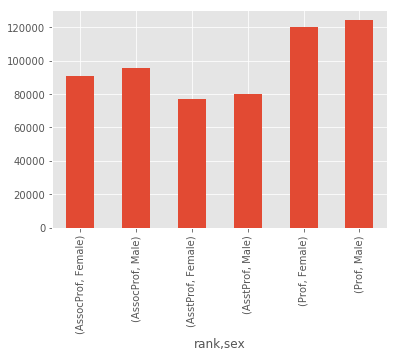

In [341]:
# převést na plotly
academic_salary.groupby(['rank', 'sex']).salary.median().plot(kind='bar')

In [485]:
# zlepšená verze; převést na plotly
#academic_salary.groupby(['rank', 'sex']).salary.median().unstack(level = 1).plot(kind ='bar')
academic_salary_median = academic_salary.groupby(['rank', 'sex']).salary.median().unstack(level = 1)
df_2 = academic_salary_median.iloc[[1,0,2]]
df_2

sex,Female,Male
rank,,
AsstProf,77000.0,80182.0
AssocProf,90556.5,95626.5
Prof,120257.5,123996.0


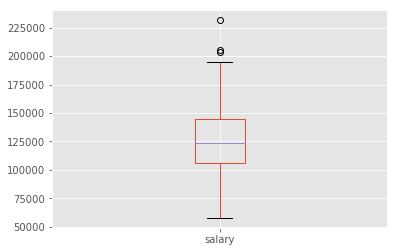

In [392]:
academic_salary.loc[academic_salary['rank'] == 'Prof'].salary.plot.box()

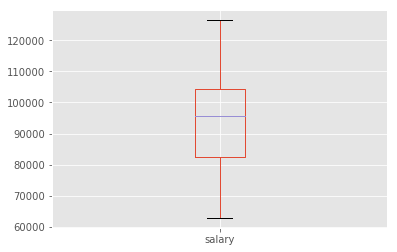

In [363]:
academic_salary.loc[academic_salary['rank'] == 'AssocProf'].salary.plot.box()

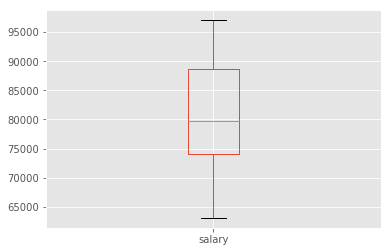

In [364]:
academic_salary.loc[academic_salary['rank'] == 'AsstProf'].salary.plot.box()

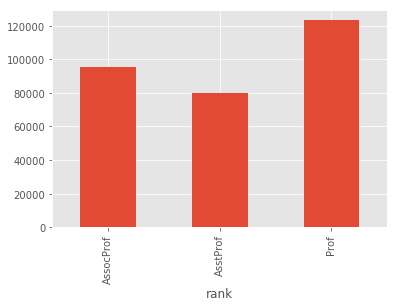

In [359]:
# Boxplot Median Salary in Different Ranks; vyřešit zobrazení v boxplot
academic_salary.groupby(['rank']).salary.median().plot.bar()

In [357]:
academic_salary[academic_salary['rank']=='Prof'].salary.median()

123321.5

In [489]:
# Conclusion 2008 US college Gender based Salary distribution
trace = go.Scatter(
    x = academic_salary['yrs.service'],
    y = academic_salary[academic_salary['sex']== 'Female'].salary,
    mode = 'markers',
    name = 'Female'
)

layout = go.Layout(
    title = 'aaaa',
    showlegend = True,
    xaxis=dict(
        title="Year"),
)

data = [trace]
fig = dict(data=data, layout=layout)
py.offline.iplot(fig)